In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt 

- Compute a numerical solution, using second order approximation for both partial derivatives and initial data

$$g(x) = e^{-300(x-0.5)^2}$$

Use the following parameters: $\Delta x= \Delta t = 0.001$, $c=1$. Plot the solution at every $0.25$ units of time from $t=0$ to $t=1.5$.


In [2]:
#funcion definition
g = lambda x: np.exp( -300*((x -0.5)**2) )

## solution method implementation

We have to start by building our discrete mesh which ilustrates the space-time grid where we will be working on.

In this case we discretize the time and space domain as follows:

\begin{align}
\vec{x}\ &=\ <0,\quad 1\Delta x,\quad 2\Delta x,\quad...\quad, i\Delta x,\quad ...\quad ,xend> \quad i=0,1,...,N_{x}\\
\vec{t}\ &=\ <0,\quad 1\Delta t,\quad 2\Delta t,\quad...\quad, i\Delta t,\quad ...\quad ,tend> \quad i=0,1,...,N_{t}
\end{align}


In [3]:
def solution_method(xend: float,
                        tend: float,
                        xstart = 0, 
                        tstart = 0,
                        dx = 0.001,
                        dt = 0.001, 
                        c  = 1):
    
    #span of time and space
    timespan  = np.arange(start = tstart, stop = tend + dt, step = dt)
    spacespan = np.arange(start = xstart, stop = xend + dx, step = dx)

    
    #number of elements in the time and space span
    Nx = len(spacespan)
    Nt = len(timespan)
    
    #some function relevant contstans
    sigma = c*dx/dt
    
    # Initialize solution matrix  
    X, Y = np.meshgrid(spacespan, timespan)
    


solution_method(xend = 1, tend = 1.5)

In [4]:
def solve_wave_eqn(c:      float,
                   g:      callable,
                   startt: float, 
                   startx: float,
                   endt:   float, 
                   endx:   float,
                   dt:     float, 
                   dx:     float,) -> np.ndarray:
    
    """
    Solves the wave equation u_tt - c^2 u_xx = 0 with Dirichlet boundary conditions
    using the finite difference method with second order centered difference approximations. 
    
    Parameters:
        - c (float):    the wave speed.
        - g (callable): the initial condition function, which takes a 1D NumPy array x and
                        returns a 1D NumPy array of the same shape as x.
        - startt (float): the start time of the simulation.
        - startx (float): the start position of the simulation.
        - endt (float):   the end time of the simulation.
        - endx (float):   the end position of the simulation.
        - dt (float):     the time step size.
        - dx (float):     the position step size.
        
    Returns:
        - U (ndarray):    a 2D NumPy array of shape (M+1, N+2) containing the numerical solution
                          U_ij at each grid point (x_j, t_i).
                          
    Plots:
        - A 3D surface plot of the numerical solution U_ij at each grid point (x_j, t_i).
    """
    
    #time and space discretization
    x = np.arange(startx, endx+dx*2, dx) # include boundary points
    t = np.arange(startt, endt+dt, dt)   # include boundary points
    
    N = len(x) - 2  #ommit the included boundary points of x
    M = len(t) - 1  #ommit the included boundary point  of t
    
    U   = np.zeros((M+1, N+2))
    
    #constant for computing U
    cte = (c**2)*(dt**2)/(dx**2)
    
    # set initial conditions
    U[0, 1:N+1] = g(x[1:N+1])
    U[1, 1:N+1] = U[0,1:N+1] + dt*g(x[1:N+1])
    
    
    # compute numerical solution
    for n in range(1, M):
        for j in range(1, N+1):
            U[n+1,j] = 2*U[n,j] - U[n-1,j] +  (cte * (U[n,j-1] - 2*U[n,j] + U[n,j+1]))
        
        # apply boundary conditions
        U[n+1,0] = 0
        U[n+1,N+1] = 0
        U[n+1,1] = U[n+1,2] + (cte * (U[n+1,0] - 2*U[n+1,1] + U[n+1,2]))
        U[n+1,N] = U[n+1,N-1] + (cte * (U[n+1,N+1] - 2*U[n+1,N] + U[n+1,N-1]))
    
    # plot numerical solution
    X, T = np.meshgrid(x, t)

    # plot 3D surface
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, T, U, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u(x,t)')
    plt.show()
    
    return U

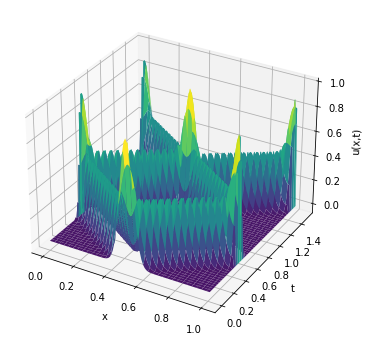

In [21]:

# test the code with a sample initial condition and parameters
def g(x):
    return np.exp(-300*((x - 0.5)**2))

c  = 1
dt = 0.001
dx = 0.01

startt = 0
startx = 0
endt   = 1.5
endx   = 1

U = solve_wave_eqn(c = c,
                   g = g,
                   startt = startt,
                   startx = startx,
                   endt   = endt, 
                   endx   = endx,
                   dt     = dt, 
                   dx     = dx)




Discretize the domain: Divide the interval $0<x<1$ into $N$ subintervals of equal length $\Delta x$, such that $x_i = i \Delta x$, where $i = 0,1,2,\ldots,N$ and $x_0 = 0$, $x_N = 1$. Similarly, divide the time interval $0<t<T$ into $M$ subintervals of equal length $\Delta t$, such that $t_j = j \Delta t$, where $j = 0,1,2,\ldots,M$ and $t_M = T$.

Apply the initial and boundary conditions: Set the initial condition $u^{0}{i} = g(x_i)$ and the boundary conditions $u^{j}{0} = u^{j}_{N} = 0$ for all $j$.

Compute the solution: Use the above numerical scheme to compute the values of $u^{j}_{i}$ at each grid point $(i,j)$ for $0\le j \le M$ and $0\le i \le N$.

Note that the stability of the numerical scheme requires that $\Delta t/\Delta x \leq 1/c$. In this case, we have $\Delta t = \Delta x = 0.001$, which satisfies the stability condition since $c=1$.